In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("credit_dataset.csv")

In [3]:
data

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


In [4]:
data.describe(include='all')

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134,25134,25134,25134.000000,2.513400e+04,25134,25134,25134,25134,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
unique,NaN,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,15630,14618,16461,NaN,NaN,15622,16808,17509,22102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12566.500000,5.078838e+06,NaN,NaN,NaN,0.512334,1.948339e+05,NaN,NaN,NaN,NaN,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,NaN,NaN,NaN,0.787785,1.045110e+05,NaN,NaN,NaN,NaN,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,NaN,NaN,NaN,0.000000,1.350000e+05,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,NaN,NaN,NaN,0.000000,1.800000e+05,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [6]:
data.nunique()

Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

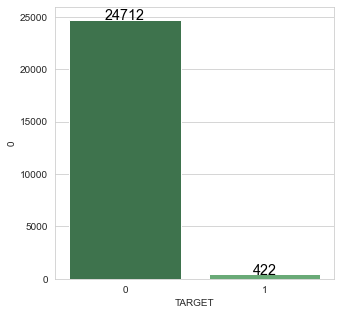

In [7]:
#Calculating count of Fraud vs No Fraud cases
plt.figure(figsize=(5,5))
target_group = data.groupby('TARGET').size().reset_index()
pal = sns.color_palette("Greens_d", len(target_group))
rank = target_group["TARGET"].argsort().argsort()
g = sns.barplot(x = target_group['TARGET'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['TARGET'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [8]:
#checking for NULL VALUES in dataset
data.isna().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

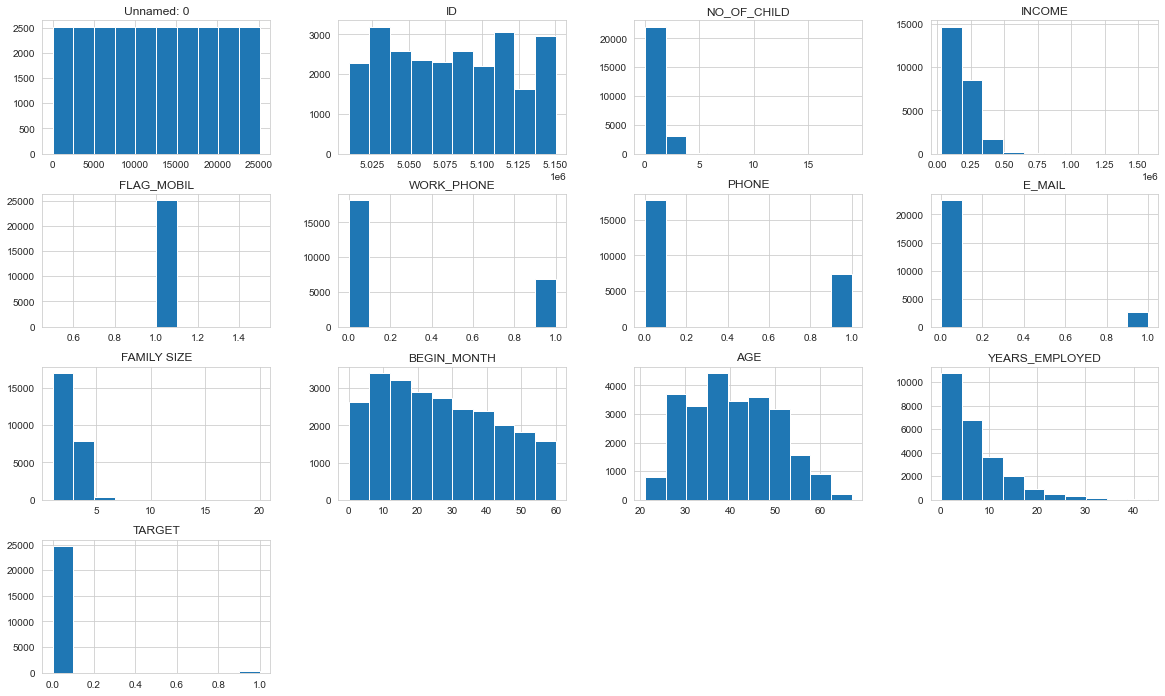

In [9]:
#Distribution of continuous 
data.hist(figsize=(20,12))
plt.show()

In [10]:
data.drop(columns={"ID"},inplace=True,axis=1)

In [11]:
data.drop(columns={"Unnamed: 0"},inplace=True,axis=1)

In [12]:
#all the categorical columns with their values -
cols=data.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(data[i].unique())
    print("")

Distinct_values :
 'column_name' = GENDER
['M' 'F']

Distinct_values :
 'column_name' = CAR
['Y' 'N']

Distinct_values :
 'column_name' = REALITY
['Y' 'N']

Distinct_values :
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values :
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values :
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values :
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



In [13]:
#Detecting Outliers
#these columns have continuous values other are having discrete entries
cont=data[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

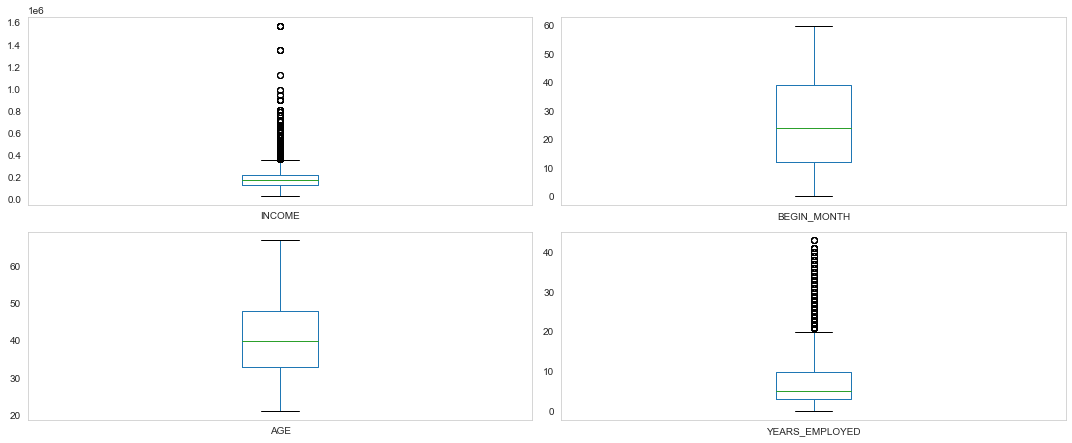

In [14]:
#Using Boxplot to detect the outliers-
plt.figure(figsize=(15,12))

for i ,col in enumerate(list(cont.columns)):
    plt.subplot(4,2,i+1)
    cont.boxplot(col)
    plt.grid()
    plt.tight_layout()

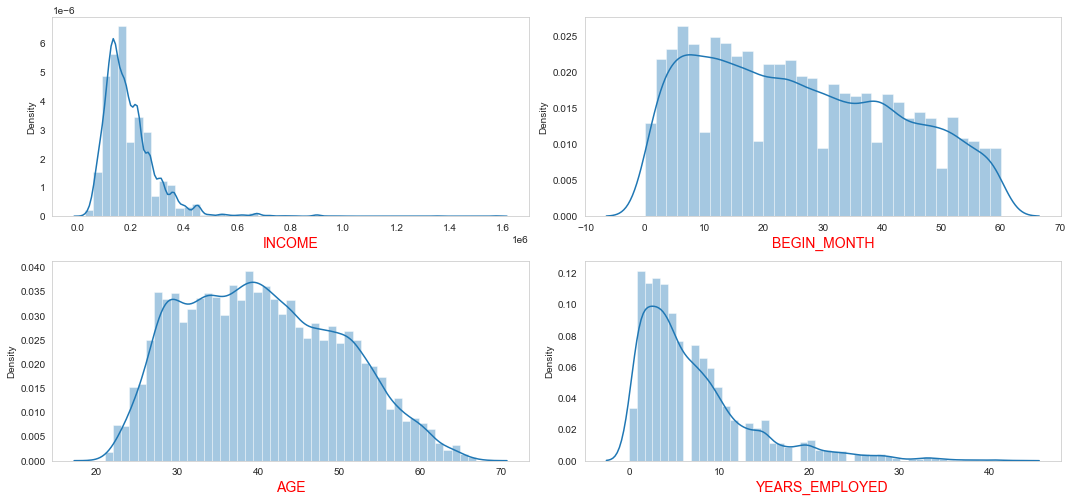

In [15]:
# Distribution of columns those have continuous -
#Histogram
plt.figure(figsize=(15,10))

for i ,cols in enumerate(list(cont.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(cont[cols])
    plt.xlabel(cols,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()

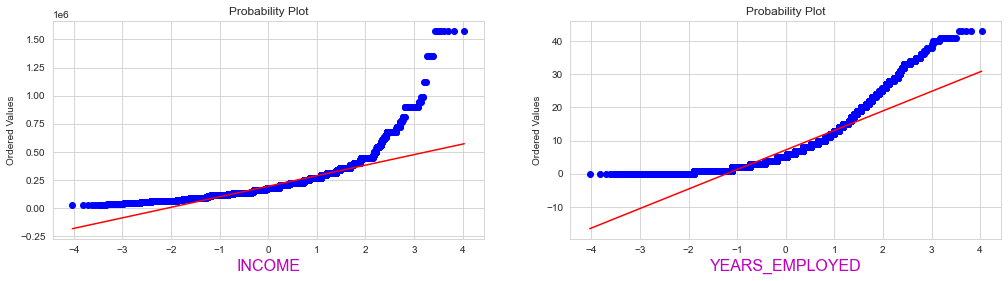

In [16]:
#income and years_employed have outliers
plt.figure(figsize=(17,4))

plt.subplot(121)
res=stats.probplot(data.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")

plt.subplot(122)
res=stats.probplot(data.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.show()

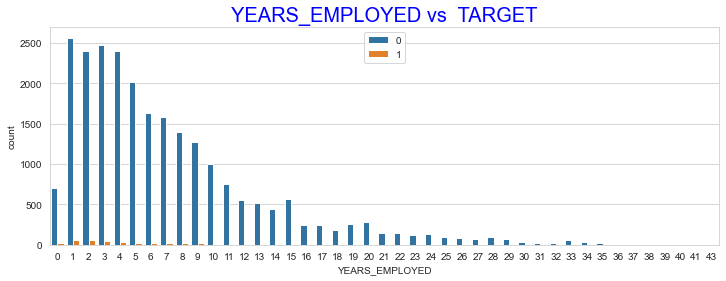

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data["YEARS_EMPLOYED"],hue="TARGET",data=data)
plt.title("YEARS_EMPLOYED vs  TARGET",fontsize=20,color="BLUE")
plt.legend()
plt.show()

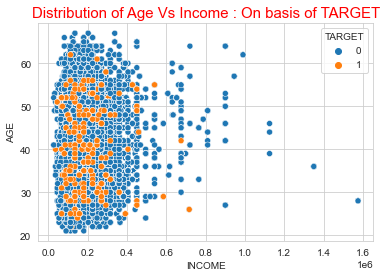

In [18]:
sns.scatterplot(data["INCOME"],data["AGE"],hue=data["TARGET"])
plt.title("Distribution of Age Vs Income : On basis of TARGET",fontsize=15,color="Red")
plt.show()

In [19]:
#removing values those are greater then 600000
data=data[data['INCOME'] < 600000]

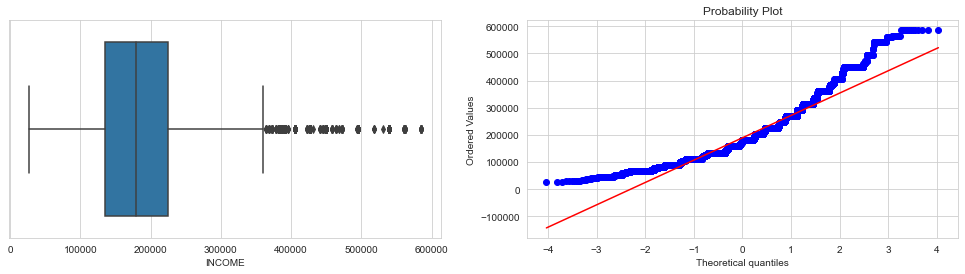

In [20]:
plt.figure(figsize=(17,4))

plt.subplot(121)
sns.boxplot(data.INCOME)

plt.subplot(122)
res=stats.probplot(data.INCOME,plot=plt,dist="norm")

In [21]:
#Dropping the values greater the 20
data=data[data['YEARS_EMPLOYED'] < 20]

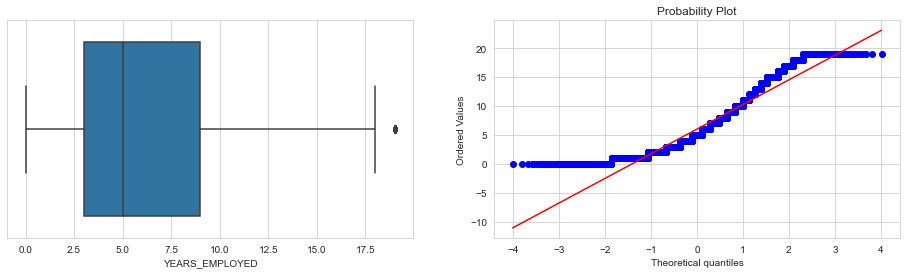

In [22]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(data.YEARS_EMPLOYED)
plt.subplot(122)
res=stats.probplot(data.YEARS_EMPLOYED,plot=plt,dist="norm")

In [23]:
#everyone has phone 
data.drop("FLAG_MOBIL",inplace=True,axis=1)

In [24]:
#converting float data types to INT64 datatype
floats=["INCOME","FAMILY SIZE","BEGIN_MONTH"]

for i in floats:
    data[i]=data[i].astype("int64")

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
labels=["GENDER","CAR","REALITY","INCOME_TYPE","EDUCATION_TYPE","HOUSE_TYPE","FAMILY_TYPE"]
label=LabelEncoder()

for i in labels:
    data[i]=label.fit_transform(data[i])

In [27]:
#dataset after using LabelEncoder
data

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,0,0,1,0,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,0,0,1,0,270000,0,4,3,1,0,1,1,1,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,1,0,315000,4,4,1,1,0,0,0,2,11,48,7,1
25130,0,0,1,0,157500,0,1,1,1,0,1,1,2,23,34,4,1
25131,0,0,1,0,157500,1,1,1,1,0,1,1,2,32,34,4,1
25132,0,0,1,0,283500,4,4,1,1,0,0,0,2,9,49,2,1


In [28]:
#corr of the 
data.corr()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
GENDER,1.000000,0.335480,-0.038093,0.007133,0.215555,0.054693,0.049496,-0.048857,0.050642,0.016151,-0.022394,-0.029970,0.033294,-0.004875,-0.088454,-0.074834,0.018699
CAR,0.335480,1.000000,0.010930,0.060831,0.213636,0.001591,-0.072167,-0.098587,0.005645,-0.024479,-0.025668,0.001649,0.104713,0.026117,-0.052365,-0.002096,-0.003231
REALITY,-0.038093,0.010930,1.000000,0.021140,0.030626,-0.029387,0.008892,0.001889,-0.176601,-0.207793,-0.060026,0.062439,0.021296,-0.011152,0.089129,-0.008422,-0.022924
NO_OF_CHILD,0.007133,0.060831,0.021140,1.000000,-0.034394,0.041044,-0.024205,-0.161934,0.004803,-0.000719,-0.013026,-0.016472,0.905458,0.006449,-0.238263,0.015776,-0.003085
INCOME,0.215555,0.213636,0.030626,-0.034394,1.000000,-0.151565,-0.201597,0.036170,-0.007361,-0.098489,0.006639,0.068385,-0.045235,0.031696,0.053488,0.044452,0.011164
INCOME_TYPE,0.054693,0.001591,-0.029387,0.041044,-0.151565,1.000000,0.105883,-0.012714,-0.008985,0.079314,0.002694,-0.042644,0.043303,-0.005473,0.001142,0.024137,-0.001414
EDUCATION_TYPE,0.049496,-0.072167,0.008892,-0.024205,-0.201597,0.105883,1.000000,-0.001881,-0.029707,0.007729,-0.054091,-0.105592,-0.019444,-0.013024,0.144156,0.020961,-0.010094
FAMILY_TYPE,-0.048857,-0.098587,0.001889,-0.161934,0.036170,-0.012714,-0.001881,1.000000,0.040743,-0.048622,-0.026204,-0.013375,-0.520295,-0.042932,0.011540,-0.033102,0.022860
HOUSE_TYPE,0.050642,0.005645,-0.176601,0.004803,-0.007361,-0.008985,-0.029707,0.040743,1.000000,0.002463,-0.024382,-0.007611,-0.018643,-0.028966,-0.181886,-0.056428,0.001291
WORK_PHONE,0.016151,-0.024479,-0.207793,-0.000719,-0.098489,0.079314,0.007729,-0.048622,0.002463,1.000000,0.364953,-0.064787,0.016321,0.013210,-0.045377,0.012513,0.007058


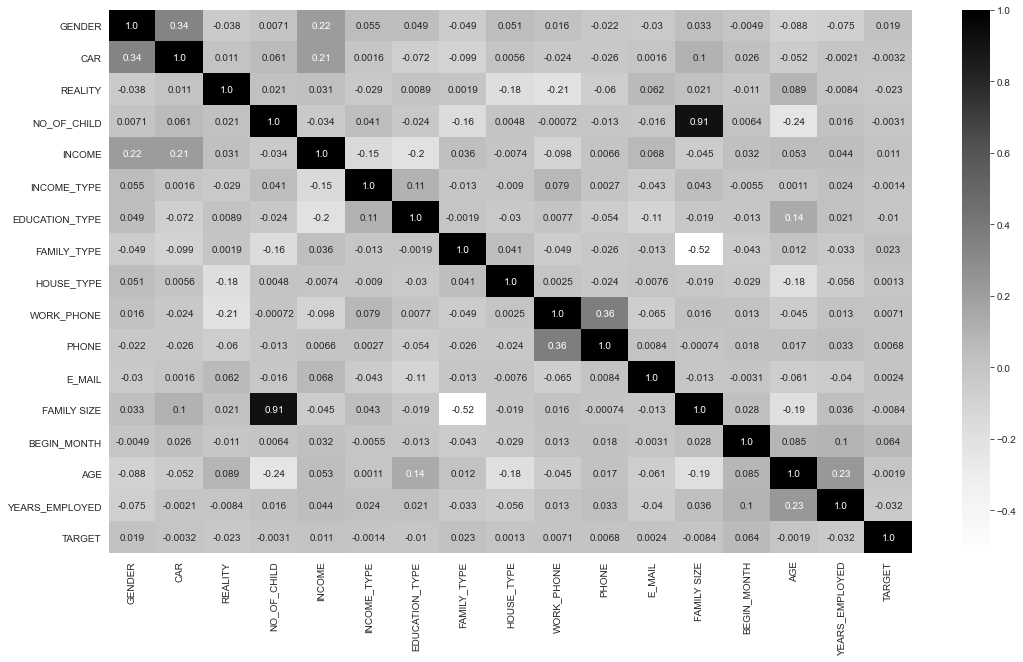

In [29]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt='.2',cmap="Greys")
plt.show()

In [30]:
#FAMILY_SIZE and NO_OF_CHILD are highly correlated to each other so we can drop one feature form the dataset
data.drop('NO_OF_CHILD',inplace=True,axis=1)

# Feature Selection

In [31]:
from sklearn.tree import ExtraTreeClassifier

In [32]:
X=data.drop("TARGET",axis=1)
y=data.TARGET

In [33]:
print("X :",X.shape)
print("y :",y.shape)

X : (23361, 15)
y : (23361,)


In [34]:
model=ExtraTreeClassifier()
model.fit(X,y)

ExtraTreeClassifier()

In [35]:
print(model.feature_importances_)

[3.29270859e-02 2.33233310e-02 5.54437247e-04 1.35879292e-01
 5.22504924e-02 2.21030453e-02 4.06005976e-02 3.15854414e-02
 2.04085198e-04 1.94119973e-02 2.31471583e-02 7.55755071e-02
 2.85242255e-01 1.37584151e-01 1.19611123e-01]


In [36]:
feat=pd.Series(model.feature_importances_,index=X.columns)

In [37]:
feats=feat.to_frame().reset_index()
feats.columns=["Features","Scores"]
features=feats.sort_values(by="Scores",ascending=False)
top_features=features.nlargest(12,"Scores")
top_features

,Features,Scores
12,BEGIN_MONTH,0.285242
13,AGE,0.137584
3,INCOME,0.135879
14,YEARS_EMPLOYED,0.119611
11,FAMILY SIZE,0.075576
4,INCOME_TYPE,0.052250
6,FAMILY_TYPE,0.040601
0,GENDER,0.032927
7,HOUSE_TYPE,0.031585
1,CAR,0.023323


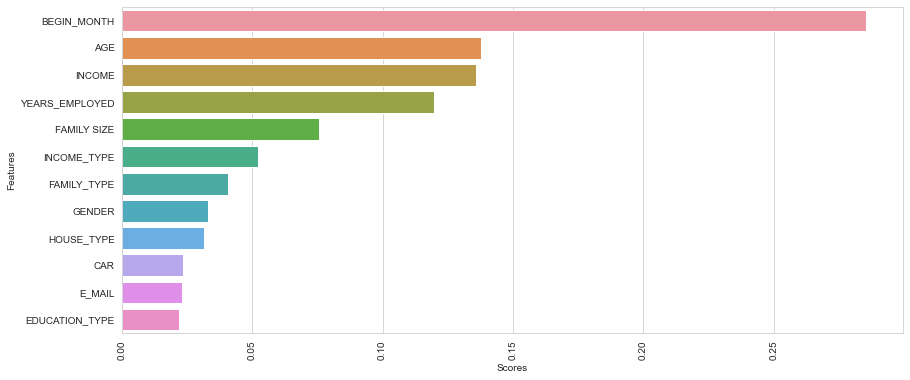

In [38]:
plt.figure(figsize=(14,6))
sns.barplot(y="Features",x="Scores",data=top_features)
plt.xticks(rotation=90)
plt.show()

In [39]:
new_data=data[["REALITY","BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","CAR"
                  ,"E_MAIL","HOUSE_TYPE","EDUCATION_TYPE","TARGET"]]

In [40]:
new_data.shape

(23361, 13)

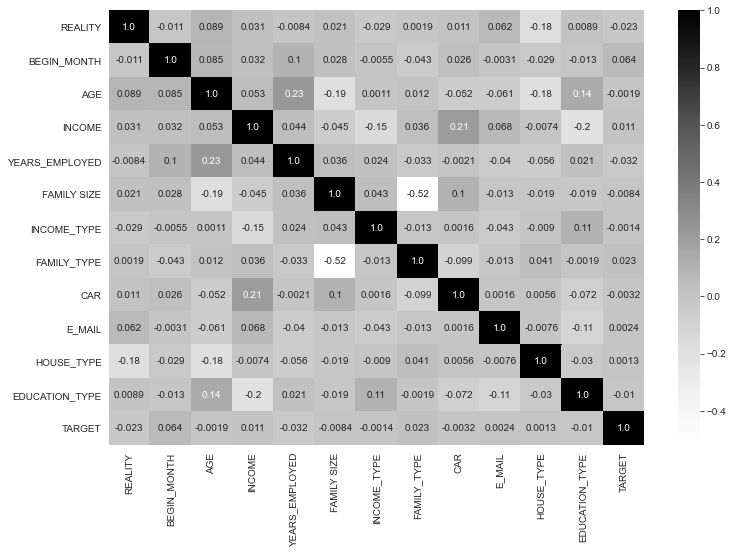

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(),fmt='.2',annot=True,cmap="Greys")
plt.show()

In [42]:
new_data.head()

,REALITY,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,FAMILY SIZE,INCOME_TYPE,FAMILY_TYPE,CAR,E_MAIL,HOUSE_TYPE,EDUCATION_TYPE,TARGET
0,1,29,59,112500,3,2,4,1,1,0,1,4,0
1,1,4,52,270000,8,1,0,3,0,1,1,4,0
2,1,26,52,270000,8,1,0,3,0,1,1,4,0
3,1,26,52,270000,8,1,0,3,0,1,1,4,0
4,1,38,52,270000,8,1,0,3,0,1,1,4,0


# Dummy Variables

In [43]:
dummy_data=pd.get_dummies(new_data,columns={"REALITY","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","E_MAIL","CAR",
                                            "HOUSE_TYPE","EDUCATION_TYPE"},drop_first=True)

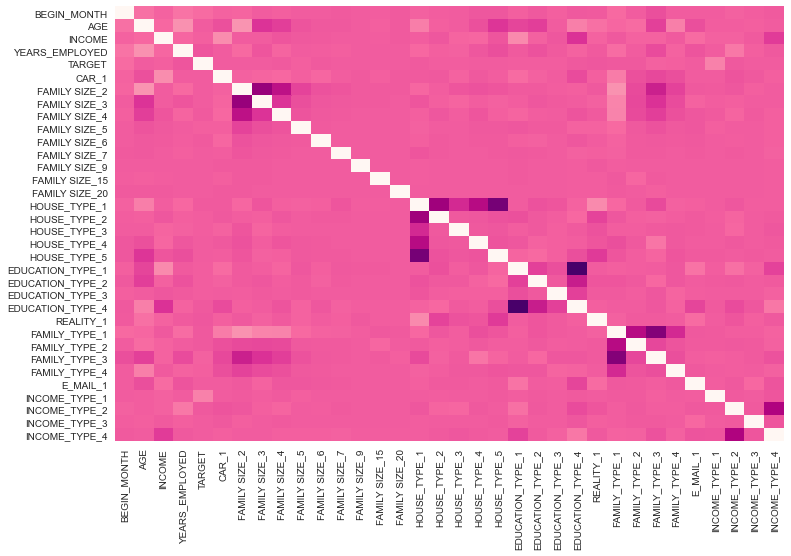

In [44]:
#checking the correlation of the new dataset
plt.figure(figsize=(12,8))
sns.heatmap(dummy_data.corr(),fmt='.2',cbar=False,cmap="RdPu_r")
plt.show()

In [45]:
da=dummy_data.copy()

In [46]:
data_minority=da[data["TARGET"] == 1]
data_majority=da[data["TARGET"] == 0]

In [47]:
print("Data_majority :",data_majority.shape)
print("Data_minority :",data_minority.shape)

Data_majority : (22957, 34)
Data_minority : (404, 34)


# Oversampling

In [48]:
#K Means SMOTE
#library for perfroming SMOTE
from imblearn.over_sampling import SMOTE